In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
housing_data = fetch_california_housing()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
X = pd.DataFrame(housing_data['data'], columns =  housing_data.feature_names)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
Y = pd.DataFrame(housing_data['target'], columns =  ['target'])
Y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)
Xtrain, C, Ytrain, Y_valid = train_test_split(X_train, Y_train, random_state = 42)

In [7]:
#input to be shared either in tuple or list, we give number of feature as input which is 8 in this case
Xtrain.shape[1:]

(8,)

In [12]:
#no flattening required here as data is already in row format
layers = [tf.keras.layers.Dense(30, activation = "relu", input_shape = Xtrain.shape[1:]), 
         tf.keras.layers.Dense(10, activation = "relu", name = "hiddenLayer1"),
         tf.keras.layers.Dense(5, activation = "relu", name = "hiddenLayer2"),
         tf.keras.layers.Dense(1)] 
#Since this is a regresion problem we don't need any activation function in the last layer and number of units will be one

In [13]:
reg = tf.keras.models.Sequential(layers)

In [14]:
reg.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                270       
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 10)                310       
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [15]:
scaler = StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [19]:
LOSS_FUNCTION = "mse" 
OPTIMIZER = "SGD" 

reg.compile(loss = LOSS_FUNCTION, optimizer = OPTIMIZER)

In [20]:
EPOCH = 20
VALIDATION_SET = (X_valid, Y_valid)

model = reg.fit(Xtrain, Ytrain, epochs = EPOCH, validation_data = VALIDATION_SET)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8138 - val_loss: 0.5306
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4393 - val_loss: 0.4523
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3809 - val_loss: 0.4084
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3655 - val_loss: 0.3863
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3567 - val_loss: 0.3777
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3500 - val_loss: 0.4618
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3443 - val_loss: 0.5082
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3406 - val_loss: 0.4320
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3481 - val_loss: 0.7431
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3465 - val_loss: 0.5833

<AxesSubplot:>

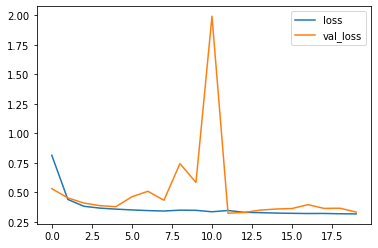

In [21]:
pd.DataFrame(model.history).plot()

In [23]:
reg2 = tf.keras.models.Sequential(layers) 

EPOCH = 100

LOSS_FUNCTION = "mse" 
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate = 1e-3)

reg2.compile(loss = LOSS_FUNCTION, optimizer = OPTIMIZER)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('model_ckpt.h5', save_best_only=True)
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
tf_cb=tf.keras.callbacks.TensorBoard(log_dir="logs")

model = reg.fit(Xtrain, Ytrain, epochs = EPOCH, validation_data = VALIDATION_SET, callbacks=[tf_cb, early_stopping_cb, checkpoint_cb])

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3164 - val_loss: 0.3606
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3135 - val_loss: 0.3358
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3114 - val_loss: 0.3484
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3107 - val_loss: 0.3370
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3101 - val_loss: 0.3603
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3129 - val_loss: 0.3084
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3093 - val_loss: 0.3367
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3091 - val_loss: 2.1410
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3310 - val_loss: 0.3752
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3121 - val_lo

In [24]:
%load_ext tensorboard

In [25]:
%tensorboard --logdir="logs"